<a href="https://colab.research.google.com/github/aslucky0143/Machine_Learning_Practice_Colab/blob/main/ML_practice_day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to be imported**

In [ ]:
import pandas as pd 
import numpy as np
"""
Social_Network_Ads.csv file used initally
file_link = https://drive.google.com/file/d/1E9MBZvTA8aBItfuYZx2VMtv9nx7bFiTr/view?usp=share_link

Find all the CSV files in the below link:
https://drive.google.com/file/d/1E9MBZvTA8aBItfuYZx2VMtv9nx7bFiTr/view?usp=share_link

"""

# **Data Reading and Understanding**

reading csv

In [ ]:
#reading the data using pandas 
df = pd.read_csv('/content/Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


Functions to be performed using the data frame (pandas)

In [ ]:
dflen=len(df)#len of the dataframe
dfshape=df.shape#shape of dataframe
dfhead=df.head()#head of dataframe
dftail=df.tail()#tail of dataframe
dfdescribe=df.describe()#description of dataframe includes count mean std min 25% 50% 75% max
print(dflen,dfshape,dfhead,dftail,dfdescribe,sep="\n")


400
(400, 5)
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
      User ID  Gender  Age  EstimatedSalary  Purchased
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000   

Data Preprocessing

In [ ]:
"""Convertion of string data to integer"""
from sklearn import preprocessing
str_to_int=preprocessing.LabelEncoder()
df=df.apply(str_to_int.fit_transform)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,97,1,1,4,0
1,392,1,17,5,0
2,155,0,8,26,0
3,64,0,9,39,0
4,382,1,1,57,0
...,...,...,...,...,...
395,196,0,28,24,1
396,220,1,33,8,1
397,130,0,32,5,1
398,305,1,18,17,0


In the given CSV (dataset) purchased column is the final result so we extract the purchased column to a new variable

In [ ]:
x=df.drop(['Purchased'],axis=1)#removes the specified feature
y=df['Purchased']#assigned the result feature to a new variable


Preparing the training and testing datasets


In [ ]:
#creates the entire training and testing datasets at a time using sklearn module
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

     User ID  Gender  Age  EstimatedSalary
250      390       0   26               23
63        26       1   14               94
312      270       0   20               33
159       57       0   14              104
283      142       0   34                6
..       ...     ...  ...              ...
323       89       0   30               14
192      345       1   11               26
117       39       1   18               35
47       339       0    9               37
172      369       0    8               92

[300 rows x 4 columns]


Data Set


     User ID  Gender  Age  EstimatedSalary
132      257       1   12               68
309      128       0   20               33
341      341       1   17               56
196      279       0   12               60
246      113       0   17               33
..       ...     ...  ...              ...
146      301       0    9               75
135       16       1    5               45
390      386       1   30               17
264       60     

# **Decision Tree**

Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)#this command will get the y values based on the x_test values
data_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
data_predicted


,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,1
135,0,0
390,1,1
264,1,0


Creating a Confusion Matrix 


> Note: From here we use mostly metrics package under sklearn



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 7, 25]])

***Scores***

Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(y_test,y_pred)*100)

Accuracy score:  90.0


Precision Score

In [ ]:
from sklearn.metrics import precision_score
print("Precision score: ",precision_score(y_test,y_pred)*100)

Accuracy score:  89.28571428571429


Recall Score

In [ ]:
from sklearn.metrics import recall_score
print("Recall score: ",recall_score(y_test,y_pred)*100)

Recall score:  78.125


F1 Score

In [ ]:
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(y_test,y_pred)*100)

F1 score:  83.33333333333334


# **Decision Tree Visualization**

Tree visualization using tree.plot_tree

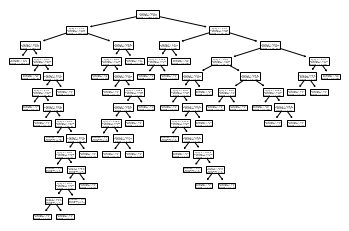

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)

Graphviz

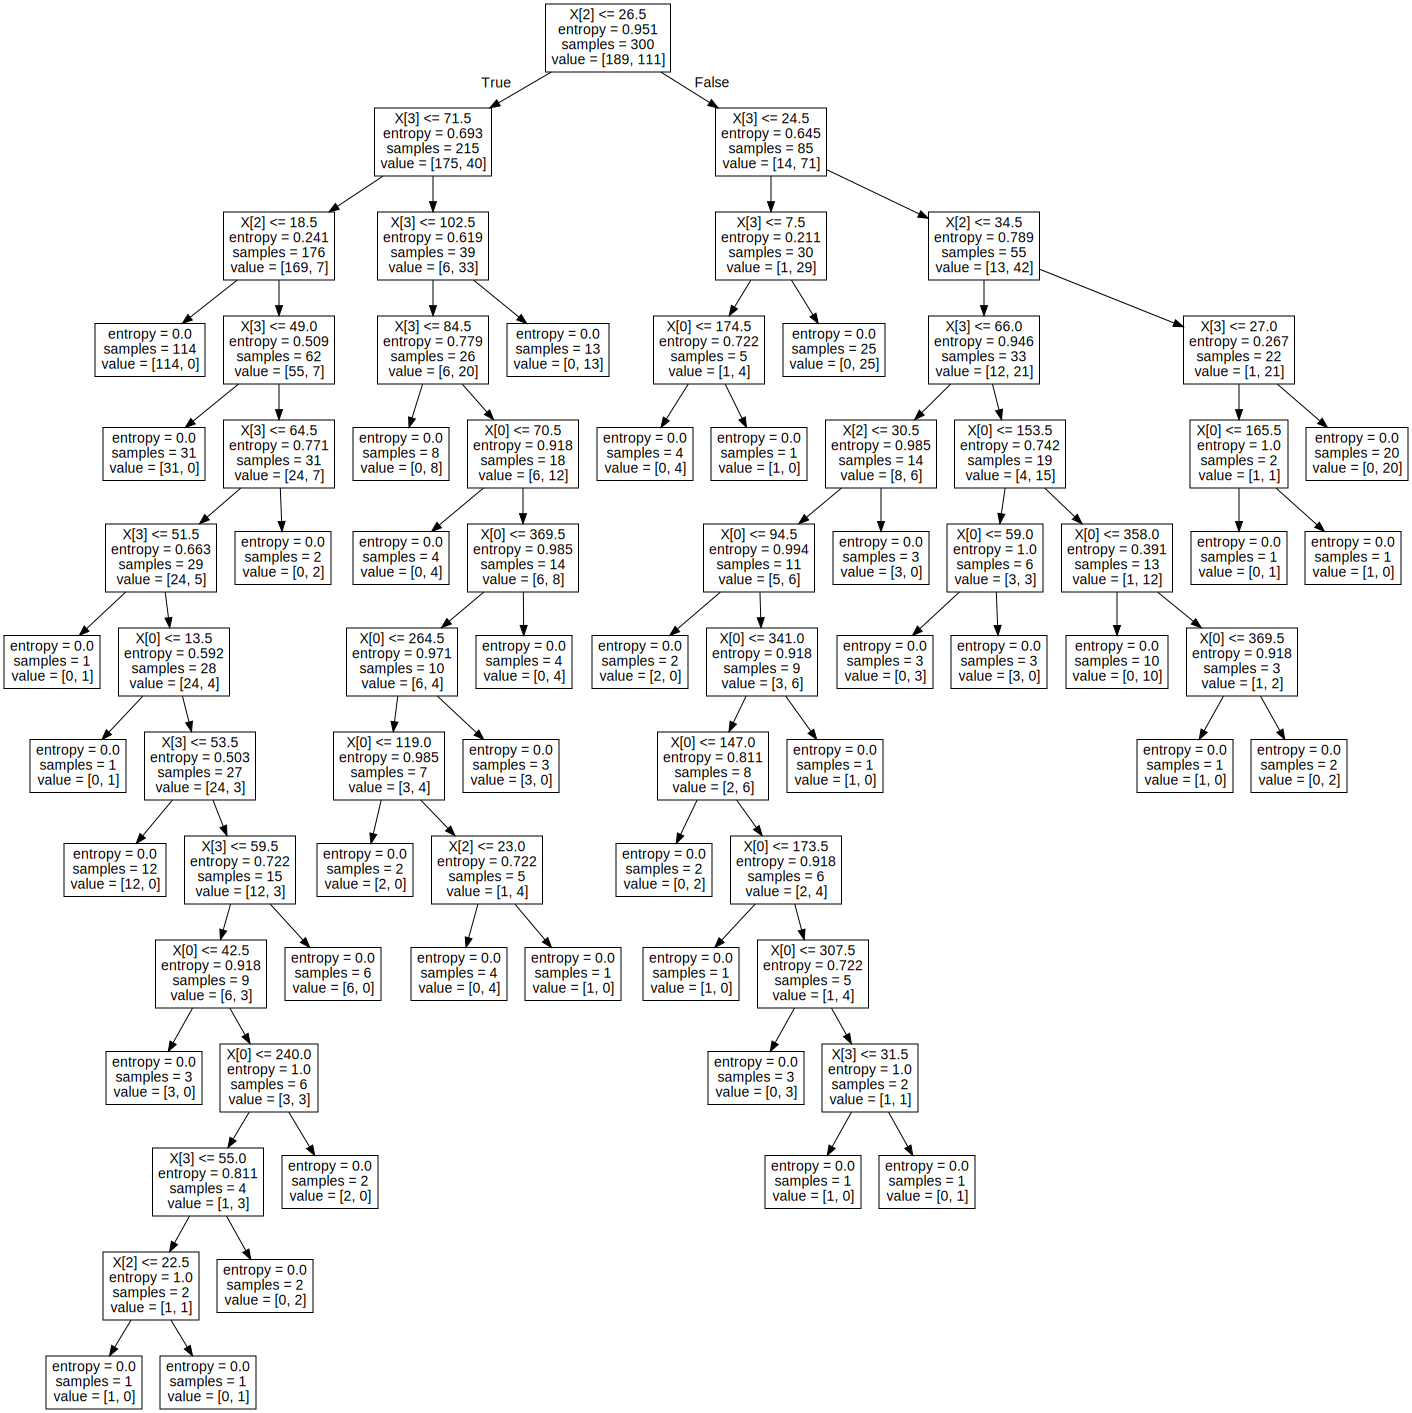

In [ ]:
import graphviz
dot_data=tree.export_graphviz(classifier,out_file=None)
graph=graphviz.Source(dot_data)
graph